In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Timestamp

In [2]:
georgia= pd.read_csv('polling_data_ga.csv')
north_carolina= pd.read_csv('polling_data_nc.csv')
pennsylvania= pd.read_csv('polling_data_pa.csv')
wisconsin= pd.read_csv('polling_data_wi.csv')
michigan= pd.read_csv('polling_data_mi.csv')
arizona= pd.read_csv('polling_data_az.csv')
nevada= pd.read_csv('polling_data_nv.csv')
polydata = pd.read_csv('polymarket_state_party_daily.csv')

In [3]:
georgia['state'] = 'Georgia'
north_carolina['state'] = 'North Carolina'
pennsylvania['state'] = 'Pennsylvania'
wisconsin['state'] = 'Wisconsin'
michigan['state'] = 'Michigan'
arizona['state'] = 'Arizona'
nevada['state'] = 'Nevada'

In [4]:
state_polls = pd.concat([georgia, north_carolina, pennsylvania, wisconsin, michigan, arizona, nevada], ignore_index=True)

In [5]:
state_polls.to_csv('state_polls.csv', index=False)

In [6]:
state_polls.columns=(state_polls.columns.str.strip().str.lower().str.replace(' ', '_'))
state_polls = state_polls.drop(columns=['unnamed:_0'])
state_polls

,pollster,date,sample,moe,trump_(r),harris_(d),spread,state
0,Final Results,—,—,—,50.7,48.5,Trump+2.2,Georgia
1,RCP Average,10/20 - 11/4,—,—,49.1,47.8,Trump+1.3,Georgia
2,Atlas Intel,11/3 - 11/4,1112 LV,3.0,50.0,48.0,Trump+2,Georgia
3,InsiderAdvantage,11/2 - 11/3,800 LV,3.7,49.0,48.0,Trump+1,Georgia
4,Atlas Intel,11/1 - 11/2,1174 LV,3.0,50.0,48.0,Trump+2,Georgia
...,...,...,...,...,...,...,...,...
446,The Hill/Emerson,7/22 - 7/23,800 RV,3.4,49.0,44.0,Trump+5,Nevada
447,InsiderAdvantage,7/15 - 7/16,800 LV,3.5,48.0,42.0,Trump+6,Nevada
448,PPP (D),7/10 - 7/11,596 RV,—,52.0,44.0,Trump+8,Nevada
449,The Hill/Emerson,2/16 - 2/19,1000 RV,3.0,48.0,40.0,Trump+8,Nevada


In [7]:
def extract_end_date(date_str):
    date_str = str(date_str)
    if '-' in date_str:
        parts = date_str.split('-')
        
        if '/' in parts[-1]:  
            end_str = parts[-1]
        else:  
            month = parts[0].split('/')[0]
            end_str = f"{month}/{parts[-1]}"
    else:
        end_str = date_str
    end_str = f"{end_str}/2024"
    return pd.to_datetime(end_str, errors='coerce')

In [8]:
state_polls['end_date'] = state_polls['date'].apply(extract_end_date)
state_polls[['date', 'end_date']]


,date,end_date
0,—,NaT
1,10/20 - 11/4,2024-11-04
2,11/3 - 11/4,2024-11-04
3,11/2 - 11/3,2024-11-03
4,11/1 - 11/2,2024-11-02
...,...,...
446,7/22 - 7/23,2024-07-23
447,7/15 - 7/16,2024-07-16
448,7/10 - 7/11,2024-07-11
449,2/16 - 2/19,2024-02-19


In [9]:
state_polls[state_polls['pollster'] == 'Final Results']

,pollster,date,sample,moe,trump_(r),harris_(d),spread,state,end_date
0,Final Results,—,—,—,50.7,48.5,Trump+2.2,Georgia,NaT
58,Final Results,—,—,—,50.9,47.6,Trump+3.3,North Carolina,NaT
125,Final Results,—,—,—,50.4,48.7,Trump+1.7,Pennsylvania,NaT
208,Final Results,—,—,—,49.6,48.7,Trump+0.9,Wisconsin,NaT
269,Final Results,—,—,—,49.7,48.3,Trump+1.4,Michigan,NaT
333,Final Results,—,—,—,52.2,46.7,Trump+5.5,Arizona,NaT
392,Final Results,—,—,—,52.2,46.7,Trump+5.5,Nevada,NaT


In [10]:
final_results = state_polls[state_polls['pollster'] == 'Final Results']
other_polls = state_polls[(state_polls['pollster'] != 'Final Results') & (state_polls['pollster'] != 'RCP Average')]
avg_polls = state_polls[state_polls['pollster'] == 'RCP Average']
state_polls = pd.concat([final_results, avg_polls, other_polls], ignore_index=True)
state_polls.head(12)

,pollster,date,sample,moe,trump_(r),harris_(d),spread,state,end_date
0,Final Results,—,—,—,50.7,48.5,Trump+2.2,Georgia,NaT
1,Final Results,—,—,—,50.9,47.6,Trump+3.3,North Carolina,NaT
2,Final Results,—,—,—,50.4,48.7,Trump+1.7,Pennsylvania,NaT
3,Final Results,—,—,—,49.6,48.7,Trump+0.9,Wisconsin,NaT
4,Final Results,—,—,—,49.7,48.3,Trump+1.4,Michigan,NaT
5,Final Results,—,—,—,52.2,46.7,Trump+5.5,Arizona,NaT
6,Final Results,—,—,—,52.2,46.7,Trump+5.5,Nevada,NaT
7,RCP Average,10/20 - 11/4,—,—,49.1,47.8,Trump+1.3,Georgia,2024-11-04
8,RCP Average,10/22 - 11/4,—,—,48.7,47.5,Trump+1.2,North Carolina,2024-11-04
9,RCP Average,10/18 - 11/4,—,—,48.5,48.1,Trump+0.4,Pennsylvania,2024-11-04


In [11]:
state_polls = state_polls[['state','pollster', 'end_date','sample','moe','trump_(r)', 'harris_(d)', 'spread']]
state_polls

,state,pollster,end_date,sample,moe,trump_(r),harris_(d),spread
0,Georgia,Final Results,NaT,—,—,50.7,48.5,Trump+2.2
1,North Carolina,Final Results,NaT,—,—,50.9,47.6,Trump+3.3
2,Pennsylvania,Final Results,NaT,—,—,50.4,48.7,Trump+1.7
3,Wisconsin,Final Results,NaT,—,—,49.6,48.7,Trump+0.9
4,Michigan,Final Results,NaT,—,—,49.7,48.3,Trump+1.4
...,...,...,...,...,...,...,...,...
446,Nevada,The Hill/Emerson,2024-07-23,800 RV,3.4,49.0,44.0,Trump+5
447,Nevada,InsiderAdvantage,2024-07-16,800 LV,3.5,48.0,42.0,Trump+6
448,Nevada,PPP (D),2024-07-11,596 RV,—,52.0,44.0,Trump+8
449,Nevada,The Hill/Emerson,2024-02-19,1000 RV,3.0,48.0,40.0,Trump+8


In [12]:
days_before_election = state_polls[(state_polls['end_date'] == '2024-11-01') | (state_polls['end_date'] == '2024-11-02')|(state_polls['end_date'] == '2024-11-04') | (state_polls['end_date'] == '2024-11-05') | (state_polls['end_date'] == '2024-11-03')] 

In [13]:
days_before_election[days_before_election['state'] == 'Michigan']

,state,pollster,end_date,sample,moe,trump_(r),harris_(d),spread
11,Michigan,RCP Average,2024-11-04,—,—,47.8,48.3,Harris+0.5
275,Michigan,Atlas Intel,2024-11-04,1114 LV,3.0,50.0,48.0,Trump+2
276,Michigan,Trafalgar Group (R),2024-11-03,1079 LV,2.9,48.0,47.0,Trump+1
277,Michigan,Atlas Intel,2024-11-02,1198 LV,3.0,50.0,48.0,Trump+2
278,Michigan,InsiderAdvantage,2024-11-02,800 LV,3.7,47.0,47.0,Tie
280,Michigan,NY Times/Siena,2024-11-02,998 LV,—,47.0,47.0,Tie
281,Michigan,MNS/Mitchell Research,2024-11-02,585 LV,4.0,48.0,50.0,Harris+2
282,Michigan,Rasmussen Reports,2024-11-01,908 LV,3.0,48.0,49.0,Harris+1
336,Michigan,NY Times/Siena,2024-11-03,616 LV,4.4,46.0,48.0,Harris+2


In [14]:
polls_daily = (state_polls.groupby(['state','end_date'], as_index=False)[['trump_(r)', 'harris_(d)']].mean().rename(columns={'end_date':'date'}))
polls_daily

,state,date,trump_(r),harris_(d)
0,Arizona,2024-02-19,48.00,40.00
1,Arizona,2024-07-11,52.00,44.00
2,Arizona,2024-07-16,48.00,42.00
3,Arizona,2024-07-23,49.00,44.00
4,Arizona,2024-07-28,47.00,49.00
...,...,...,...,...
294,Wisconsin,2024-10-30,48.25,48.75
295,Wisconsin,2024-10-31,49.00,49.00
296,Wisconsin,2024-11-02,48.75,48.75
297,Wisconsin,2024-11-03,47.50,47.00


In [15]:
polls_daily['date'] = pd.to_datetime(polls_daily['date'],errors='coerce')
polydata['date'] = pd.to_datetime(polydata['date'],errors='coerce')


In [16]:
polls_daily = (polls_daily.sort_values(["state","date"]).set_index("date").groupby("state").apply(lambda x: x.asfreq("D").ffill()).drop(columns=["state"]).reset_index())
polls_daily

/var/folders/_c/f9vh_y6d4qv5thsn332298xw0000gn/T/ipykernel_34849/2746861269.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  polls_daily = (polls_daily.sort_values(["state","date"]).set_index("date").groupby("state").apply(lambda x: x.asfreq("D").ffill()).drop(columns=["state"]).reset_index())


,state,date,trump_(r),harris_(d)
0,Arizona,2024-02-19,48.00,40.00
1,Arizona,2024-02-20,48.00,40.00
2,Arizona,2024-02-21,48.00,40.00
3,Arizona,2024-02-22,48.00,40.00
4,Arizona,2024-02-23,48.00,40.00
...,...,...,...,...
1539,Wisconsin,2024-10-31,49.00,49.00
1540,Wisconsin,2024-11-01,49.00,49.00
1541,Wisconsin,2024-11-02,48.75,48.75
1542,Wisconsin,2024-11-03,47.50,47.00


In [17]:
rcp_poly_data = (polydata.merge(polls_daily, on=['state','date'], how='left').sort_values(['state','date']))
rcp_poly_data

,state,date,dem_prob,other_prob,rep_prob,trump_(r),harris_(d)
0,Arizona,2024-07-21,0.299046,0.002481,0.698473,48.0,42.0
1,Arizona,2024-07-22,0.343598,0.002570,0.653832,48.0,42.0
2,Arizona,2024-07-23,0.340038,0.002511,0.657450,49.0,44.0
3,Arizona,2024-07-24,0.403838,0.004038,0.592124,49.0,44.0
4,Arizona,2024-07-25,0.400590,0.004499,0.594911,49.0,44.0
...,...,...,...,...,...,...,...
769,Wisconsin,2024-11-03,0.579938,0.000499,0.419563,47.5,47.0
770,Wisconsin,2024-11-04,0.584908,0.000500,0.414592,49.1,48.8
771,Wisconsin,2024-11-05,0.546671,0.000498,0.452831,NaN,NaN
772,Wisconsin,2024-11-06,0.067875,0.000500,0.931626,NaN,NaN


In [18]:
rcp_poly_data.groupby('state')['date'].agg(['min','max','count'])

,min,max,count
state,,,
Arizona,2024-07-21,2024-11-10,113
Georgia,2024-07-21,2024-11-07,110
Michigan,2024-07-21,2024-11-07,110
Nevada,2024-07-21,2024-11-09,112
North Carolina,2024-07-21,2024-11-06,109
Pennsylvania,2024-07-21,2024-11-07,110
Wisconsin,2024-07-21,2024-11-07,110


In [21]:
def corr_by_state (rcp_poly_data, x, y):
    out=[]
    for st, i in rcp_poly_data.groupby('state'):
        z = i[[x,y]].corr().iloc[0,1]
        out.append({'state':st, f'corr_{x}_vs_{y}': z})
    return pd.DataFrame(out)

In [27]:
correlation_daily_harris = corr_by_state(rcp_poly_data, 'dem_prob','harris_(d)')
correlation_daily_harris

### Az - weak negative
### Ga - weak negative
### Mi - very weak negative
### Nv - weak postive
### Nc - moderate positive
### Pa - very weak positive
### Wi - weak negative

,state,corr_dem_prob_vs_harris_(d)
0,Arizona,-0.119968
1,Georgia,-0.192089
2,Michigan,-0.073285
3,Nevada,0.261635
4,North Carolina,0.448558
5,Pennsylvania,0.140988
6,Wisconsin,-0.115104


In [26]:
correlation_daily_trump = corr_by_state(rcp_poly_data, 'rep_prob','trump_(r)')
correlation_daily_trump

### Az - mod positive
### Ga - weak positive
### Mi - no correlation
### Nv - very weak positive
### Nc - very weak negative
### Pa - weak positive
### Wi - weak positive

,state,corr_rep_prob_vs_trump_(r)
0,Arizona,0.496282
1,Georgia,0.212917
2,Michigan,-0.016354
3,Nevada,0.034514
4,North Carolina,-0.071086
5,Pennsylvania,0.224915
6,Wisconsin,0.202944


In [31]:
correlation_combined= correlation_daily_harris.merge(correlation_daily_trump, on='state', how='inner')
correlation_combined= correlation_combined.sort_values('state').reset_index(drop=True)
correlation_combined

,state,corr_dem_prob_vs_harris_(d),corr_rep_prob_vs_trump_(r)
0,Arizona,-0.119968,0.496282
1,Georgia,-0.192089,0.212917
2,Michigan,-0.073285,-0.016354
3,Nevada,0.261635,0.034514
4,North Carolina,0.448558,-0.071086
5,Pennsylvania,0.140988,0.224915
6,Wisconsin,-0.115104,0.202944


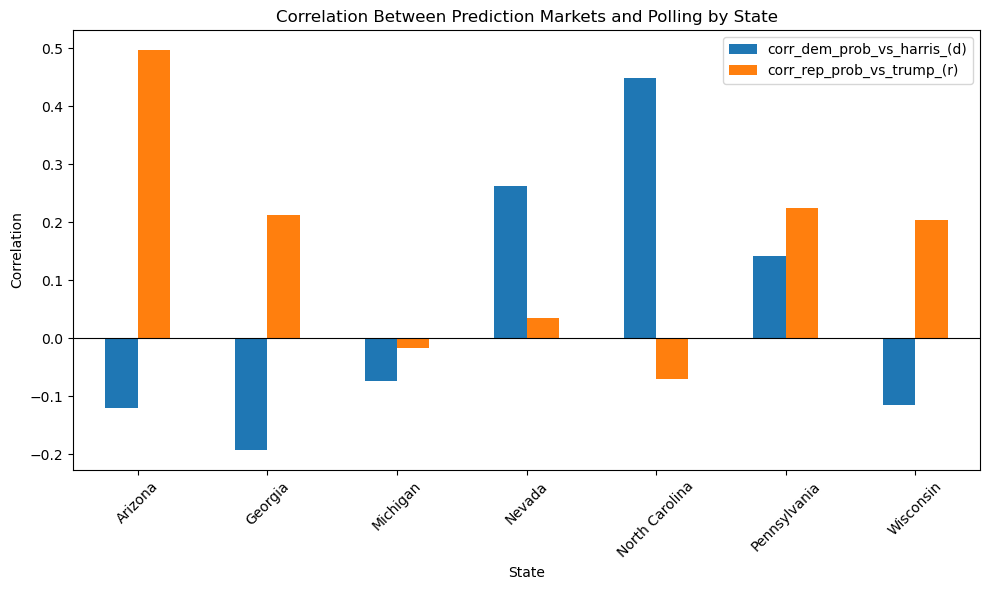

In [37]:
correlation_combined.plot(x='state', y=['corr_dem_prob_vs_harris_(d)','corr_rep_prob_vs_trump_(r)'], kind = 'bar', figsize=(10,6))

plt.title("Correlation Between Prediction Markets and Polling by State")
plt.ylabel("Correlation")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()


In [91]:
def lead_lag_scan_d(df, max_lag=10):
    rows = []
    for st, g in df.groupby("state"):
        g = g.sort_values("date").reset_index(drop=True)
        best = None
        for k in range(-max_lag, max_lag+1):   # negative = markets lead
            gk = g.copy()
            gk["dem_prob_shift"] = gk["dem_prob"].shift(k)
            c = gk[["dem_prob_shift","harris_(d)"]].corr().iloc[0,1]
            rows.append({"state": st, "shift_days": k, "corr": c})
    return pd.DataFrame(rows)

In [92]:
lead_lag_d = lead_lag_scan_d(rcp_poly_data, max_lag=10)
best_lead_lag_d = lead_lag_d.sort_values(['state','corr'], ascending=[True,False]).groupby('state').head(1)

In [93]:
lead_lag_d

,state,shift_days,corr
0,Arizona,-10,-0.022322
1,Arizona,-9,-0.023773
2,Arizona,-8,-0.060775
3,Arizona,-7,-0.046576
4,Arizona,-6,-0.051871
...,...,...,...
142,Wisconsin,6,-0.209694
143,Wisconsin,7,-0.200672
144,Wisconsin,8,-0.175343
145,Wisconsin,9,-0.150835


In [94]:
best_lead_lag_d

,state,shift_days,corr
0,Arizona,-10,-0.022322
21,Georgia,-10,0.021785
43,Michigan,-9,0.310294
73,Nevada,0,0.261635
101,North Carolina,7,0.477510
112,Pennsylvania,-3,0.218398
128,Wisconsin,-8,0.130776


In [95]:
def lead_lag_scan_r(df, max_lag=10):
    rows = []
    for st, g in df.groupby("state"):
        g = g.sort_values("date").reset_index(drop=True)
        best = None
        for k in range(-max_lag, max_lag+1):   # negative = markets lead
            gk = g.copy()
            gk["rep_prob_shift"] = gk["rep_prob"].shift(k)
            c = gk[["rep_prob_shift","trump_(r)"]].corr().iloc[0,1]
            rows.append({"state": st, "shift_days": k, "corr": c})
    return pd.DataFrame(rows)

In [96]:
lead_lag_r = lead_lag_scan_r(rcp_poly_data, max_lag=10)
best_lead_lag_r = lead_lag_r.sort_values(['state','corr'], ascending=[True,False]).groupby('state').head(1)

In [97]:
lead_lag_r

,state,shift_days,corr
0,Arizona,-10,0.473555
1,Arizona,-9,0.532764
2,Arizona,-8,0.550103
3,Arizona,-7,0.544223
4,Arizona,-6,0.571296
...,...,...,...
142,Wisconsin,6,0.141249
143,Wisconsin,7,0.103370
144,Wisconsin,8,0.100227
145,Wisconsin,9,0.107564


In [98]:
best_lead_lag_r

,state,shift_days,corr
4,Arizona,-6,0.571296
25,Georgia,-6,0.308072
43,Michigan,-9,0.279764
66,Nevada,-7,0.343864
87,North Carolina,-7,0.090187
122,Pennsylvania,7,0.476245
130,Wisconsin,-6,0.324652


In [102]:
lead_lag_combined = lead_lag_d.merge(lead_lag_r, on='state', how='outer')
best_lead_lag_combined = best_lead_lag_d.merge(best_lead_lag_r, on = 'state', how='outer')
best_lead_lag_combined

,state,shift_days_x,corr_x,shift_days_y,corr_y
0,Arizona,-10,-0.022322,-6,0.571296
1,Georgia,-10,0.021785,-6,0.308072
2,Michigan,-9,0.310294,-9,0.279764
3,Nevada,0,0.261635,-7,0.343864
4,North Carolina,7,0.477510,-7,0.090187
5,Pennsylvania,-3,0.218398,7,0.476245
6,Wisconsin,-8,0.130776,-6,0.324652


In [103]:
best_lead_lag_combined.rename(columns = {'shift_days_x':'shift_days_d', 'shift_days_y':'shift_days_r','corr_x':'corr_d','corr_y':'corr_r'})

,state,shift_days_d,corr_d,shift_days_r,corr_r
0,Arizona,-10,-0.022322,-6,0.571296
1,Georgia,-10,0.021785,-6,0.308072
2,Michigan,-9,0.310294,-9,0.279764
3,Nevada,0,0.261635,-7,0.343864
4,North Carolina,7,0.477510,-7,0.090187
5,Pennsylvania,-3,0.218398,7,0.476245
6,Wisconsin,-8,0.130776,-6,0.324652


In [106]:
#def plot_lead_lag_for_state(df, state_name):
 #   g = df[df['state'] == state_name].sort_values('shift_days')
  #  plt.figure()
   # plt.plot(g['shift_days'], g['corr'], marker='o')
    #plt.axhline(0, lw=0.8, color='gray')
    #plt.axvline(0, lw=0.8, color='gray')
    #plt.title(f"{state_name}: lead/lag correlation\n(+k: markets lead by k days)")
    #plt.xlabel("shift_days")
    #plt.ylabel("Pearson r")
    #plt.tight_layout()
    #plt.show()

#plot_lead_lag_for_state(lead_lag, "Arizona")
#plot_lead_lag_for_state(lead_lag, "Wisconsin")
#plot_lead_lag_for_state(lead_lag, "Georgia")



In [108]:
rcp_poly_data["dem_error"] = rcp_poly_data["dem_prob"] - rcp_poly_data["harris_(d)"]

0     -41.700954
1     -41.656402
2     -43.659962
3     -43.596162
4     -43.599410
         ...    
769   -46.420062
770   -48.215092
771          NaN
772          NaN
773          NaN
Name: dem_error, Length: 774, dtype: float64

In [119]:
rcp_poly_data["month"] = rcp_poly_data["date"].dt.to_period("M")

In [120]:
mean_absolute_error = (rcp_poly_data.dropna(subset=['dem_error']).groupby(['state', 'month'])['dem_error'].apply(lambda x:x.abs().mean()).reset_index(name='mae'))

In [124]:
mean_absolute_error['month_num'] = mean_absolute_error['month'].apply(lambda x: x.month)
rank = mean_absolute_error.groupby('state').apply(lambda x: x['month_num'].corr(x['mae'])).reset_index(name='month_mae_corr')
mean_absolute_error

/var/folders/_c/f9vh_y6d4qv5thsn332298xw0000gn/T/ipykernel_34849/181165081.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rank = mean_absolute_error.groupby('state').apply(lambda x: x['month_num'].corr(x['mae'])).reset_index(name='month_mae_corr')


,state,month,mae,month_num
0,Arizona,2024-07,44.720509,7
1,Arizona,2024-08,46.261469,8
2,Arizona,2024-09,47.126934,9
3,Arizona,2024-10,47.140359,10
4,Arizona,2024-11,45.972907,11
5,Georgia,2024-07,46.233917,7
6,Georgia,2024-08,47.000837,8
7,Georgia,2024-09,46.475793,9
8,Georgia,2024-10,47.295572,10
9,Georgia,2024-11,47.490106,11


In [130]:
final_results_polls = (state_polls[state_polls['pollster'] == 'Final Results'])
final_results_polls

,state,pollster,end_date,sample,moe,trump_(r),harris_(d),spread
0,Georgia,Final Results,NaT,—,—,50.7,48.5,Trump+2.2
1,North Carolina,Final Results,NaT,—,—,50.9,47.6,Trump+3.3
2,Pennsylvania,Final Results,NaT,—,—,50.4,48.7,Trump+1.7
3,Wisconsin,Final Results,NaT,—,—,49.6,48.7,Trump+0.9
4,Michigan,Final Results,NaT,—,—,49.7,48.3,Trump+1.4
5,Arizona,Final Results,NaT,—,—,52.2,46.7,Trump+5.5
6,Nevada,Final Results,NaT,—,—,52.2,46.7,Trump+5.5


In [163]:
final_results_polls['rep_win'] = final_results_polls['trump_(r)'] >final_results_polls['harris_(d)']
final_results_polls

/var/folders/_c/f9vh_y6d4qv5thsn332298xw0000gn/T/ipykernel_34849/3437370965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_results_polls['rep_win'] = final_results_polls['trump_(r)'] >final_results_polls['harris_(d)']


,state,pollster,end_date,sample,moe,trump_(r),harris_(d),spread,rep_win
0,Georgia,Final Results,NaT,—,—,50.7,48.5,Trump+2.2,True
1,North Carolina,Final Results,NaT,—,—,50.9,47.6,Trump+3.3,True
2,Pennsylvania,Final Results,NaT,—,—,50.4,48.7,Trump+1.7,True
3,Wisconsin,Final Results,NaT,—,—,49.6,48.7,Trump+0.9,True
4,Michigan,Final Results,NaT,—,—,49.7,48.3,Trump+1.4,True
5,Arizona,Final Results,NaT,—,—,52.2,46.7,Trump+5.5,True
6,Nevada,Final Results,NaT,—,—,52.2,46.7,Trump+5.5,True


In [164]:
state_outcome = final_results_polls.groupby("state", as_index=False)["rep_win"].max()
state_outcome

,state,rep_win
0,Arizona,True
1,Georgia,True
2,Michigan,True
3,Nevada,True
4,North Carolina,True
5,Pennsylvania,True
6,Wisconsin,True


In [165]:
cutoff = pd.Timestamp('2024-11-05')

In [179]:
cutoff_window=rcp_poly_data[(rcp_poly_data['date']>=cutoff-pd.Timedelta(days=3))&(rcp_poly_data['date']<=cutoff)]
cutoff_window

,state,date,dem_prob,other_prob,rep_prob,trump_(r),harris_(d),dem_error,month
104,Arizona,2024-11-02,0.251730,0.000500,0.747771,50.00,46.250000,-45.998270,2024-11
105,Arizona,2024-11-03,0.261514,0.000500,0.737986,48.50,45.000000,-44.738486,2024-11
106,Arizona,2024-11-04,0.246402,0.000498,0.753100,50.55,46.650000,-46.403598,2024-11
107,Arizona,2024-11-05,0.216666,0.000497,0.782836,NaN,NaN,NaN,2024-11
217,Georgia,2024-11-02,0.292394,0.000499,0.707106,49.00,48.333333,-48.040939,2024-11
218,Georgia,2024-11-03,0.358718,0.000498,0.640784,48.00,46.000000,-45.641282,2024-11
219,Georgia,2024-11-04,0.346182,0.000499,0.653319,49.55,47.900000,-47.553818,2024-11
220,Georgia,2024-11-05,0.323031,0.000499,0.676470,NaN,NaN,NaN,2024-11
327,Michigan,2024-11-02,0.588760,0.000499,0.410741,48.00,48.000000,-47.411240,2024-11
328,Michigan,2024-11-03,0.611880,0.000499,0.387622,47.00,47.500000,-46.888120,2024-11


In [180]:
predictions = (cutoff_window.sort_values(['state','date']).groupby('state'))
predictions= predictions.merge(state_outcome, on='state', how='left')

AttributeError: 'DataFrameGroupBy' object has no attribute 'merge'

In [177]:
predictions

,state,date,dem_prob,other_prob,rep_prob,trump_(r),harris_(d),dem_error,month,rep_win
0,Arizona,2024-11-05,0.216666,0.000497,0.782836,NaN,NaN,NaN,2024-11,True
1,Georgia,2024-11-05,0.323031,0.000499,0.676470,NaN,NaN,NaN,2024-11,True
2,Michigan,2024-11-05,0.610170,0.000498,0.389331,NaN,NaN,NaN,2024-11,True
3,Nevada,2024-11-05,0.424345,0.000499,0.575156,NaN,NaN,NaN,2024-11,True
4,North Carolina,2024-11-05,0.317022,0.000498,0.682480,NaN,NaN,NaN,2024-11,True
5,Pennsylvania,2024-11-05,0.410685,0.000499,0.588816,NaN,NaN,NaN,2024-11,True
6,Wisconsin,2024-11-05,0.546671,0.000498,0.452831,NaN,NaN,NaN,2024-11,True
